<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,96.878875,0.731534,107.610409,105.363910,2.246499
1,0.0,1.0,34.977134,-1.447484,43.529650,44.997322,-1.467673
2,0.0,2.0,33.100337,-9.431154,33.669184,43.167071,-9.497887
3,0.0,3.0,61.677977,-2.364431,69.313546,71.035989,-1.722443
4,0.0,4.0,80.605389,-5.057053,85.548335,89.494003,-3.945668
...,...,...,...,...,...,...,...
59995,999.0,55.0,85.312216,-11.532695,83.779521,95.112263,-11.332742
59996,999.0,56.0,25.414462,9.644997,45.059459,35.431472,9.627987
59997,999.0,57.0,60.113022,2.401286,72.514309,70.004346,2.509963
59998,999.0,58.0,96.663223,-0.596693,106.066530,106.422154,-0.355624


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    96.878875   0.731534  107.610409  105.363910   2.246499
      1.0    34.977134  -1.447484   43.529650   44.997322  -1.467673
      2.0    33.100337  -9.431154   33.669184   43.167071  -9.497887
      3.0    61.677977  -2.364431   69.313546   71.035989  -1.722443
      4.0    80.605389  -5.057053   85.548335   89.494003  -3.945668
...                ...        ...         ...         ...        ...
999.0 55.0   85.312216 -11.532695   83.779521   95.112263 -11.332742
      56.0   25.414462   9.644997   45.059459   35.431472   9.627987
      57.0   60.113022   2.401286   72.514309   70.004346   2.509963
      58.0   96.663223  -0.596693  106.066530  106.422154  -0.355624
      59.0   86.021201  24.792672  120.813873   95.818680  24.995193

[60000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    96.878875   0.731534  107.610409  105.363910   2.246499
      1.0    34.977134  -1.447484   43.529650   44.997322  -1.467673
      2.0    33.100337  -9.431154   33.669184   43.167071  -9.497887
      3.0    61.677977  -2.364431   69.313546   71.035989  -1.722443
      4.0    80.605389  -5.057053   85.548335   89.494003  -3.945668
...                ...        ...         ...         ...        ...
999.0 55.0   85.312216 -11.532695   83.779521   95.112263 -11.332742
      56.0   25.414462   9.644997   45.059459   35.431472   9.627987
      57.0   60.113022   2.401286   72.514309   70.004346   2.509963
      58.0   96.663223  -0.596693  106.066530  106.422154  -0.355624
      59.0   86.021201  24.792672  120.813873   95.818680  24.995193

[60000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,96.878875,0.731534,107.610409,105.363910,2.246499
1,0.0,1.0,34.977134,-1.447484,43.529650,44.997322,-1.467673
2,0.0,2.0,33.100337,-9.431154,33.669184,43.167071,-9.497887
3,0.0,3.0,61.677977,-2.364431,69.313546,71.035989,-1.722443
4,0.0,4.0,80.605389,-5.057053,85.548335,89.494003,-3.945668
...,...,...,...,...,...,...,...
59995,999.0,55.0,85.312216,-11.532695,83.779521,95.112263,-11.332742
59996,999.0,56.0,25.414462,9.644997,45.059459,35.431472,9.627987
59997,999.0,57.0,60.113022,2.401286,72.514309,70.004346,2.509963
59998,999.0,58.0,96.663223,-0.596693,106.066530,106.422154,-0.355624


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    96.878875   0.731534  107.610409  105.363910   2.246499
      1.0    34.977134  -1.447484   43.529650   44.997322  -1.467673
      2.0    33.100337  -9.431154   33.669184   43.167071  -9.497887
      3.0    61.677977  -2.364431   69.313546   71.035989  -1.722443
      4.0    80.605389  -5.057053   85.548335   89.494003  -3.945668
...                ...        ...         ...         ...        ...
999.0 55.0   85.312216 -11.532695   83.779521   95.112263 -11.332742
      56.0   25.414462   9.644997   45.059459   35.431472   9.627987
      57.0   60.113022   2.401286   72.514309   70.004346   2.509963
      58.0   96.663223  -0.596693  106.066530  106.422154  -0.355624
      59.0   86.021201  24.792672  120.813873   95.818680  24.995193

[60000 rows x 5 columns]

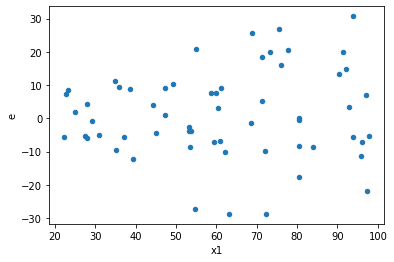

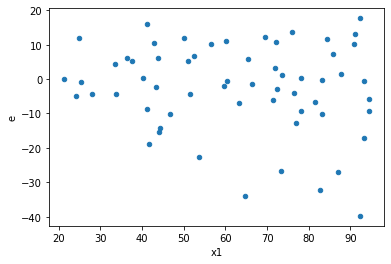

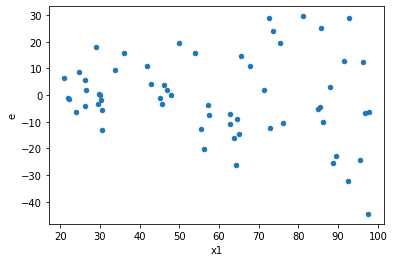

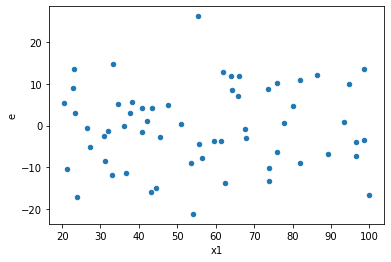

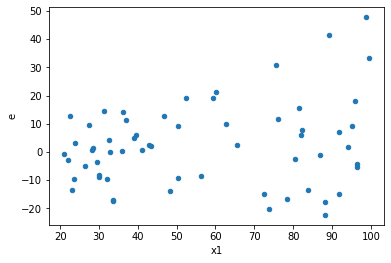

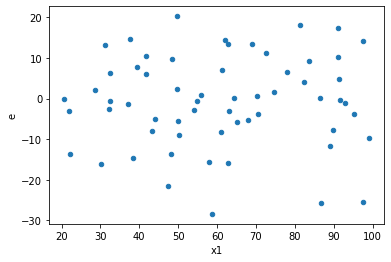

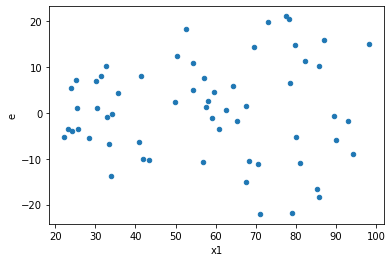

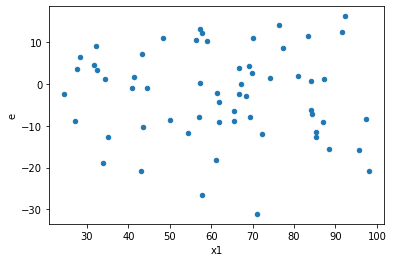

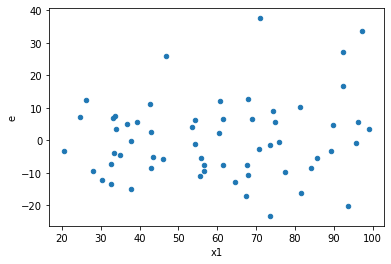

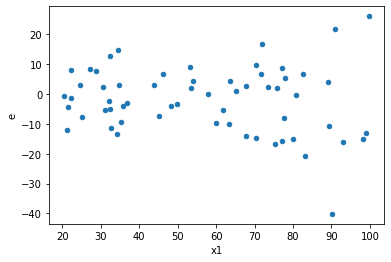

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,32.0,26.0,2419.3362224906996,5609.373530339795,75.60425695283436,215.74513578229983,2.853610953638394,0.007661284752740638,0.9961693576236297,0.003830642376370319,Reject005=0 : Heteroscedasticity
7.0,32.0,26.0,2528.9141908916595,4503.2369473650715,79.02856846536436,173.20142105250275,2.1916305004108896,0.0435361896539852,0.9782319051730074,0.0217680948269926,Reject005=0 : Heteroscedasticity
8.0,29.0,29.0,4807.165873189497,6938.737444071519,165.76434045481022,239.2668084162593,1.443415440014295,0.32855684032979715,0.8357215798351014,0.16427842016489858,Reject005=1 : Homoscedasticity
9.0,34.0,24.0,3249.8311436642043,5664.564296052387,95.58326893130013,236.02351233551613,2.469297346433679,0.02375649615231401,0.988121751923843,0.011878248076157005,Reject005=0 : Heteroscedasticity
13.0,27.0,31.0,2300.6800752422396,3132.4239934410016,85.21037315711999,101.04593527229038,1.1858407788682146,0.6432628197199954,0.6783685901400023,0.3216314098599977,Reject005=1 : Homoscedasticity
19.0,28.0,30.0,1519.0878628383653,5666.286229988583,54.253137958513044,188.8762076662861,3.4813877090522998,0.0011329218286215692,0.9994335390856892,0.0005664609143107846,Reject005=0 : Heteroscedasticity
20.0,28.0,30.0,2382.8610411974246,5073.896927523884,85.10218004276517,169.12989758412948,1.9873744421017072,0.0678152500499658,0.9660923749750171,0.0339076250249829,Reject005=1 : Homoscedasticity
23.0,34.0,24.0,1927.1901706439126,3267.9964487831853,56.68206384246802,136.1665186992994,2.4022858285071664,0.02815695538253138,0.9859215223087343,0.01407847769126569,Reject005=0 : Heteroscedasticity
24.0,36.0,22.0,3148.140398448886,2837.231384371608,87.44834440135794,128.96506292598218,1.4747570558234553,0.33854762324531196,0.830726188377344,0.16927381162265598,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,37.0,21.0,6435.319329920834,2925.177643743793,173.92754945731986,139.2941735116092,0.8008746972301282,0.5414683254131603,Reject005=1 : Homoscedasticity
1.0,23.0,35.0,5981.578147306315,2527.899061035009,260.0686151002746,72.22568745814311,0.27771781470168966,0.0019819703300708326,Reject005=0 : Heteroscedasticity
2.0,30.0,28.0,6954.373060320591,1650.117106945654,231.81243534401972,58.932753819487644,0.25422602429429153,0.0003778695959399968,Reject005=0 : Heteroscedasticity
3.0,24.0,34.0,5332.033367976148,2860.9146305175705,222.16805699900615,84.14454795639914,0.3787427818967492,0.015500215686672173,Reject005=0 : Heteroscedasticity
4.0,32.0,26.0,2419.3362224906996,5609.373530339795,75.60425695283436,215.74513578229983,2.853610953638394,0.007661284752740638,Reject005=0 : Heteroscedasticity
5.0,26.0,32.0,4324.147806922829,3618.989627615759,166.31337718933958,113.09342586299248,0.6800019804434684,0.3167029140696704,Reject005=1 : Homoscedasticity
6.0,35.0,23.0,4826.077043167661,2915.298031568115,137.88791551907602,126.75208832904849,0.9192400062898409,0.8050553199733333,Reject005=1 : Homoscedasticity
7.0,32.0,26.0,2528.9141908916595,4503.2369473650715,79.02856846536436,173.20142105250275,2.1916305004108896,0.0435361896539852,Reject005=0 : Heteroscedasticity
8.0,29.0,29.0,4807.165873189497,6938.737444071519,165.76434045481022,239.2668084162593,1.443415440014295,0.32855684032979715,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    570
Reject005=1 : Homoscedasticity      430
Name: Result_test, dtype: int64